In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("datasets/mushroom.csv")
df.head(3)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [7]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [8]:
column_names = np.array(df.columns)[1:]

for i in column_names:
    df[i] = LE.fit_transform(df[i])

In [9]:
df.duplicated().sum()

1024

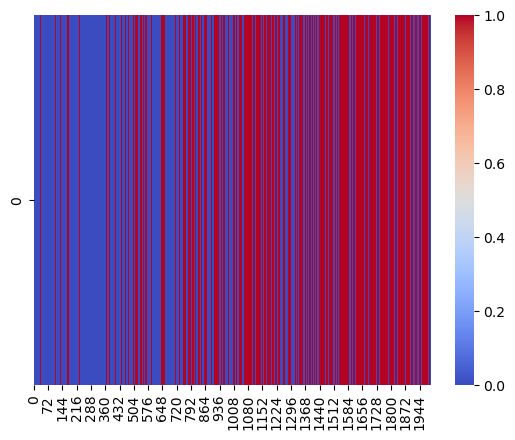

In [10]:
sb.heatmap(df.duplicated().to_frame().T, cmap='coolwarm')
plt.show()

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()


0

In [13]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                976 non-null    int64
 1   cap_shape                 976 non-null    int32
 2   cap_surface               976 non-null    int32
 3   cap_color                 976 non-null    int32
 4   bruises                   976 non-null    int32
 5   odor                      976 non-null    int32
 6   gill_attachment           976 non-null    int32
 7   gill_spacing              976 non-null    int32
 8   gill_size                 976 non-null    int32
 9   gill_color                976 non-null    int32
 10  stalk_shape               976 non-null    int32
 11  stalk_root                976 non-null    int32
 12  stalk_surface_above_ring  976 non-null    int32
 13  stalk_surface_below_ring  976 non-null    int32
 14  stalk_color_above_ring    976 non-null    int3

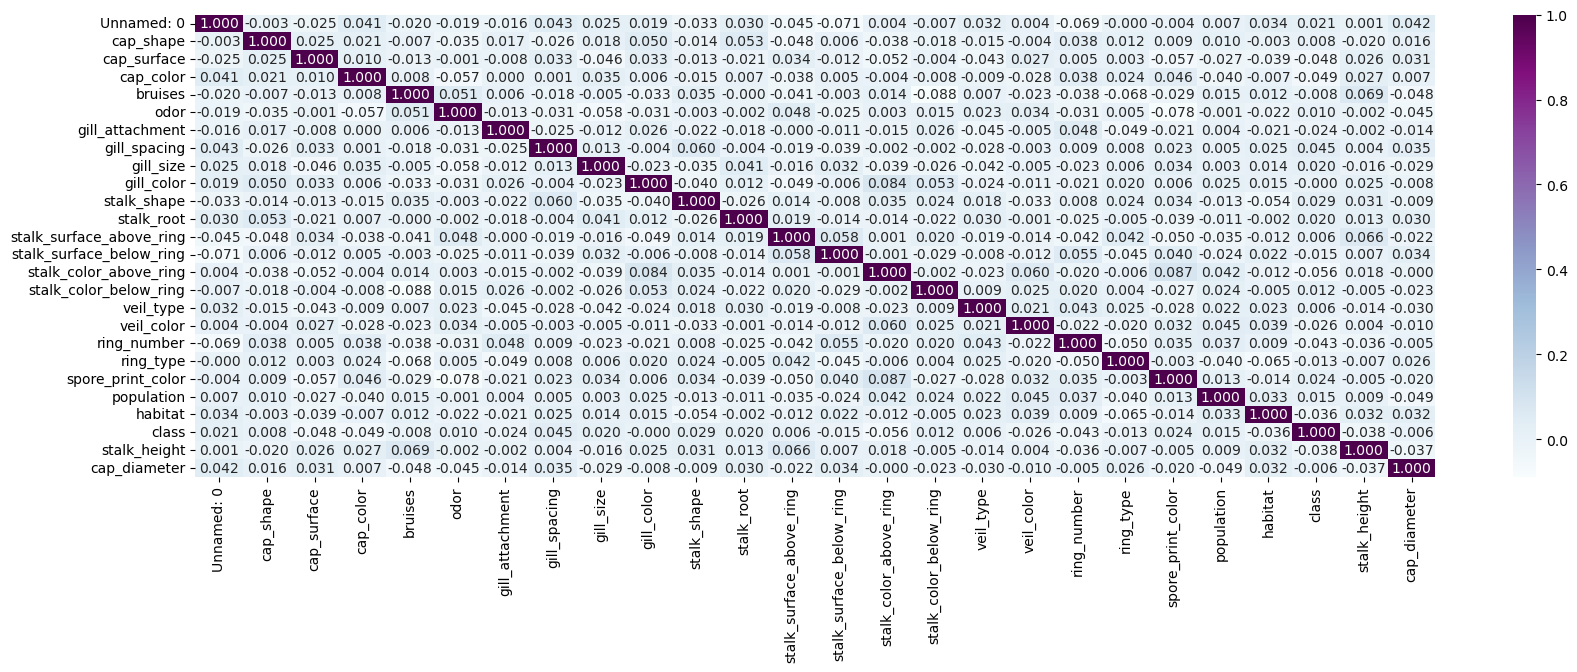

In [15]:
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(20,6))    
sb.heatmap(correlation_matrix,annot=True, fmt='.3f', cmap='BuPu')
plt.show()

In [16]:
x = df.drop(columns=['class','Unnamed: 0'])
y = df['class']

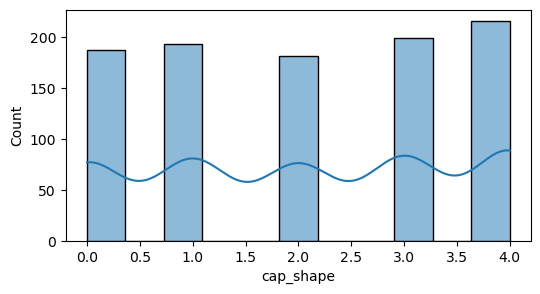

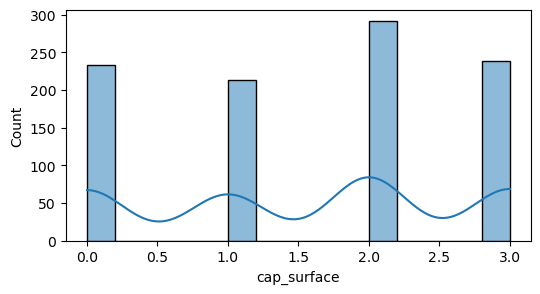

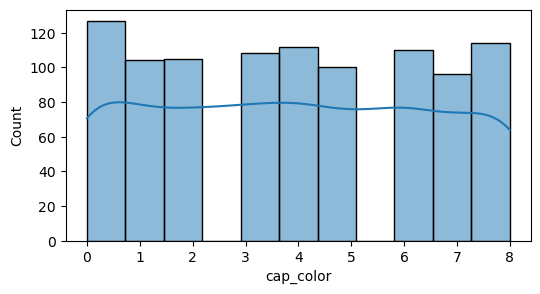

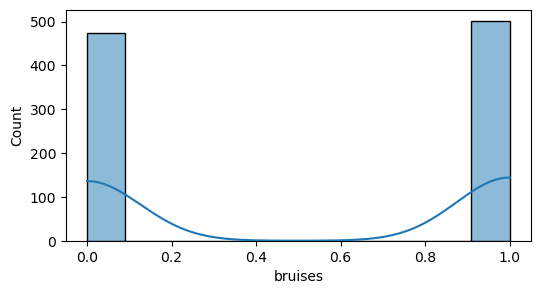

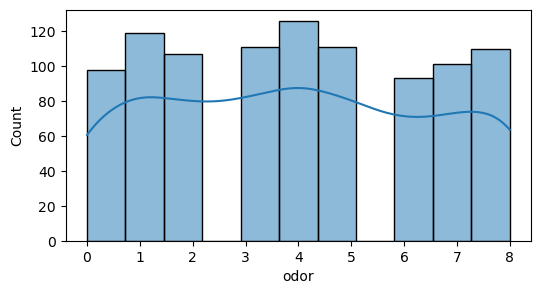

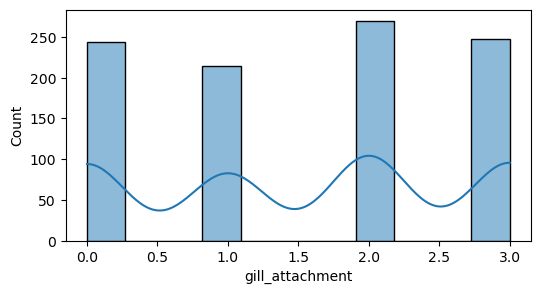

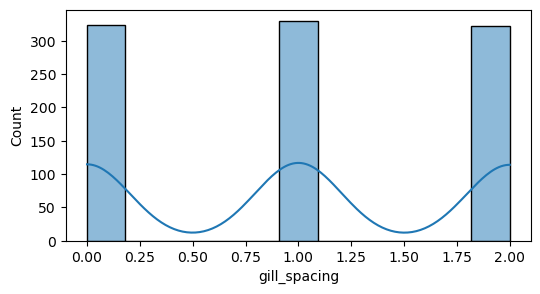

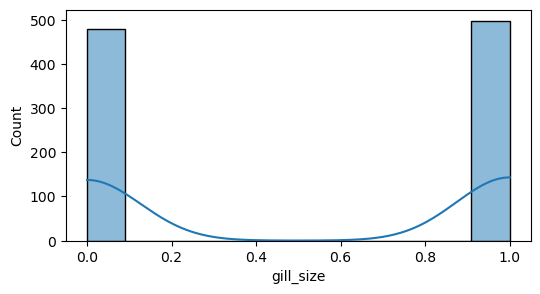

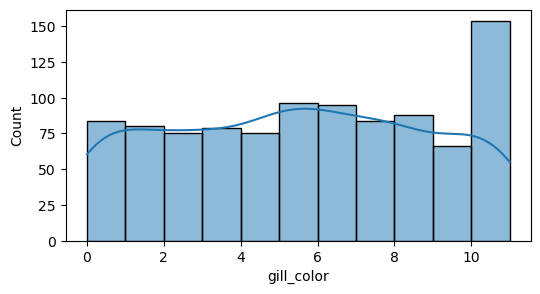

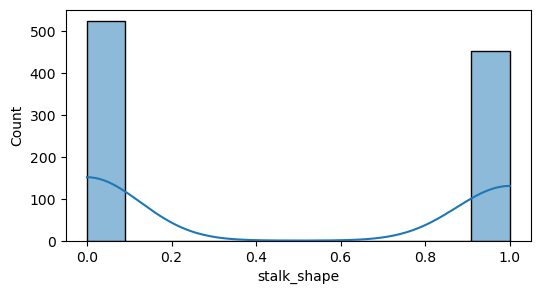

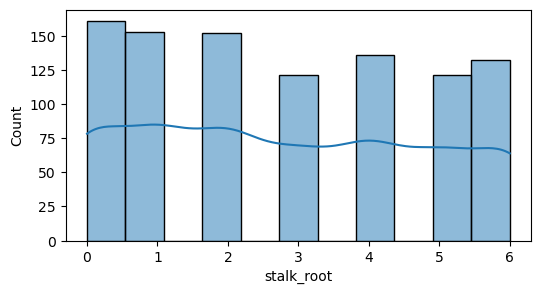

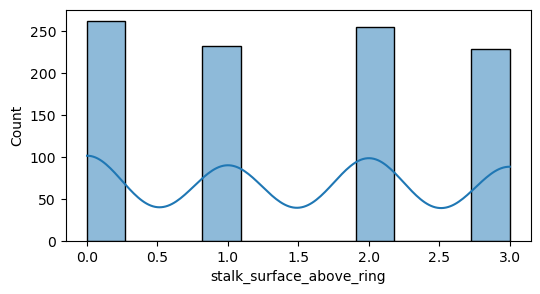

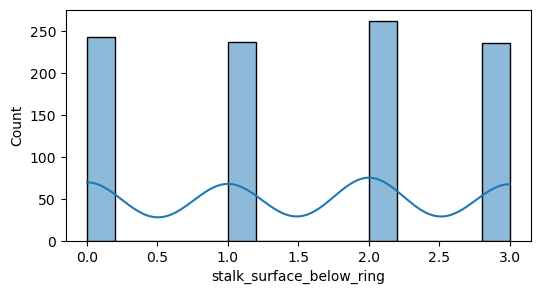

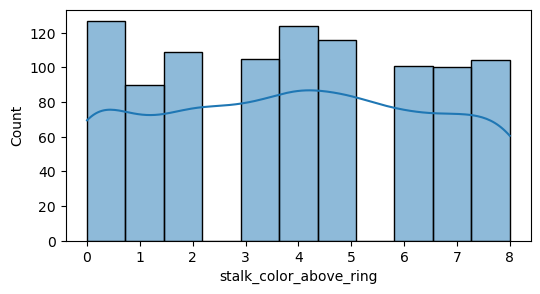

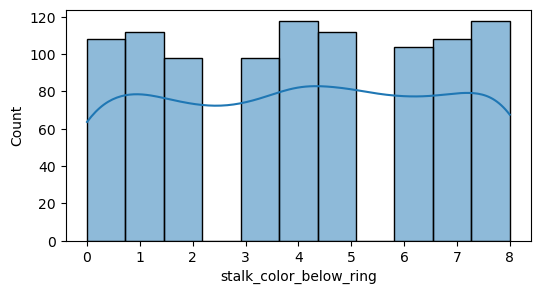

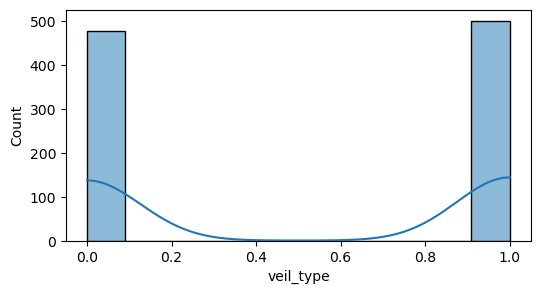

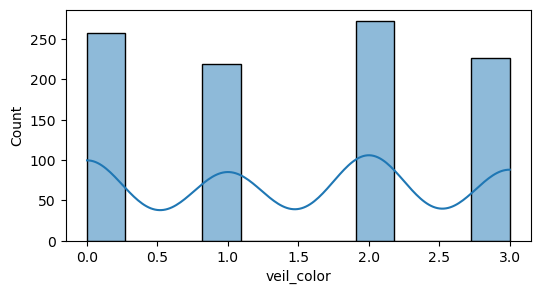

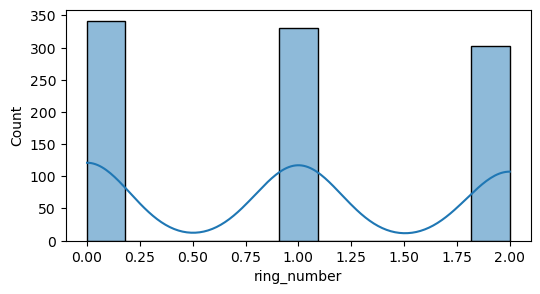

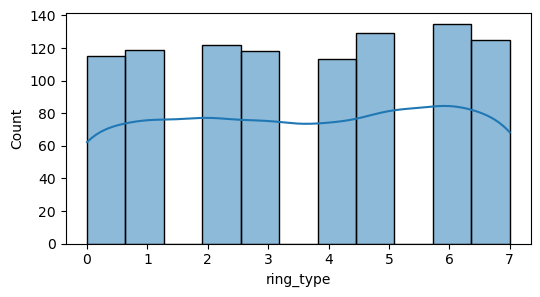

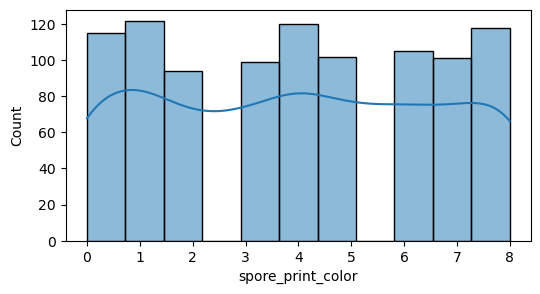

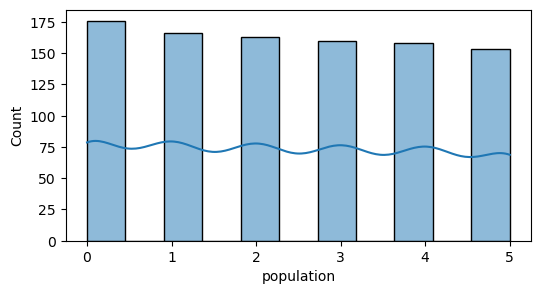

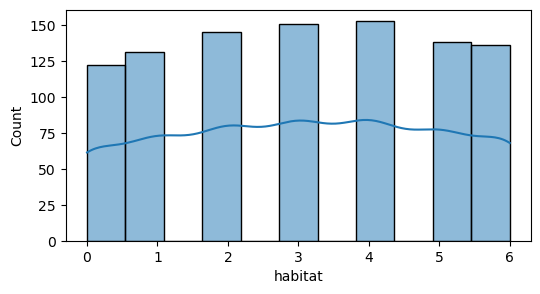

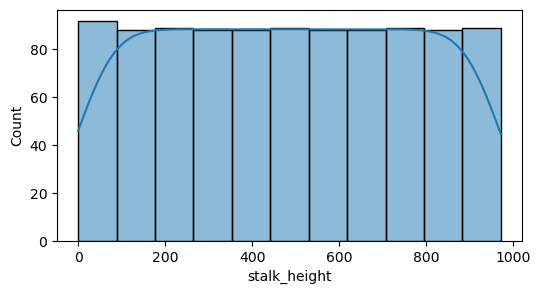

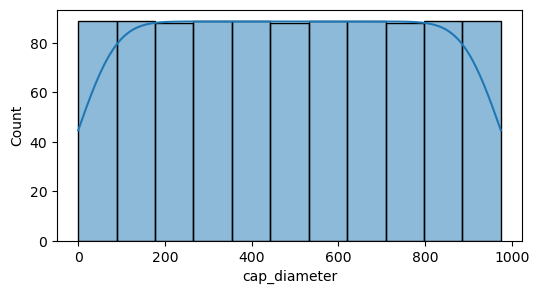

In [17]:
variables = np.array(x.columns)
for v in variables:
    plt.figure(figsize=(6,3))
    sb.histplot(df[v],kde=True)
    plt.show()

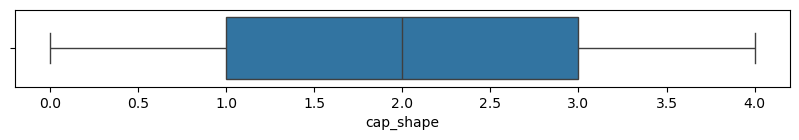

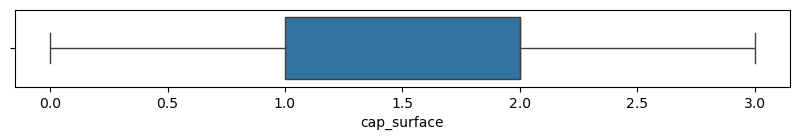

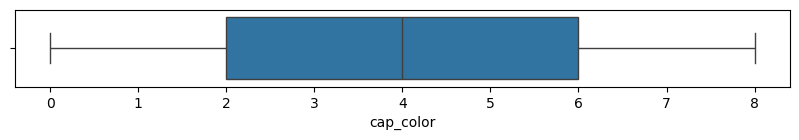

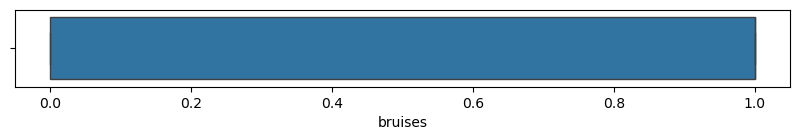

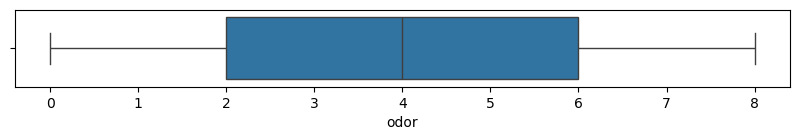

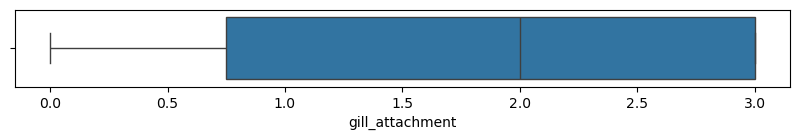

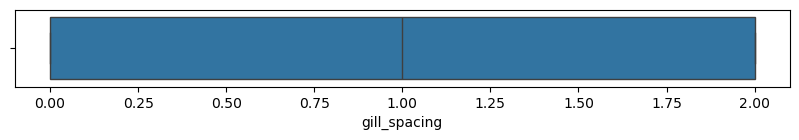

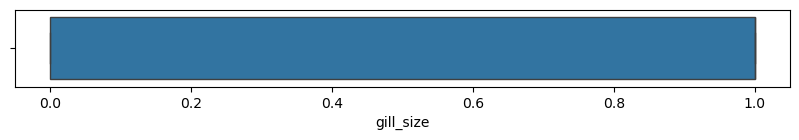

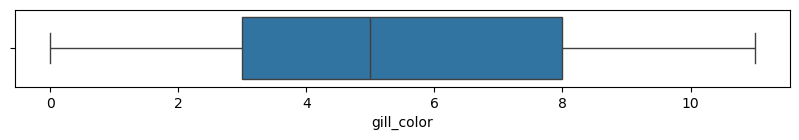

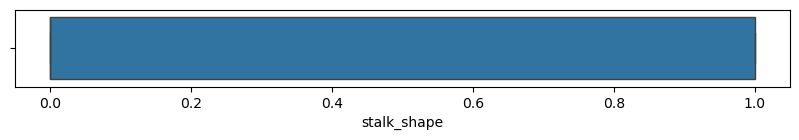

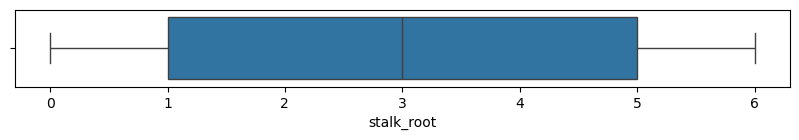

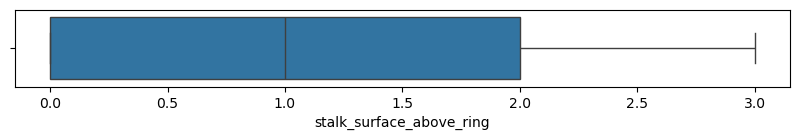

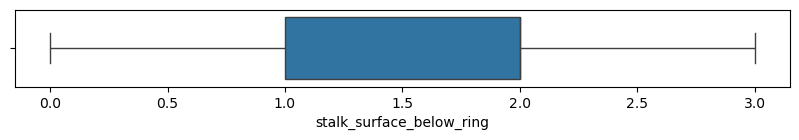

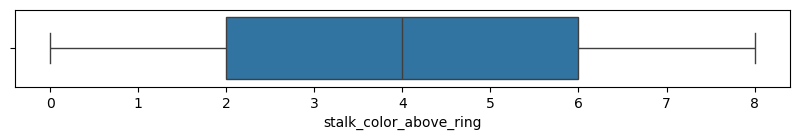

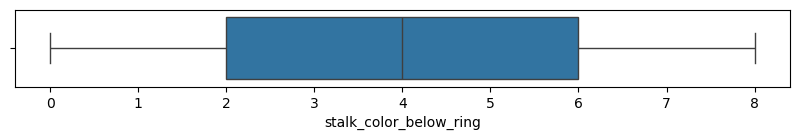

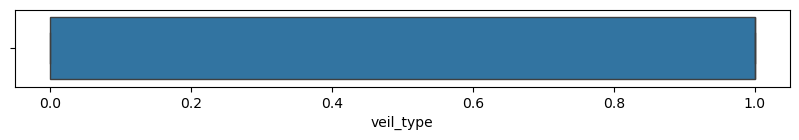

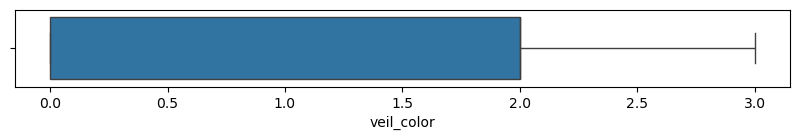

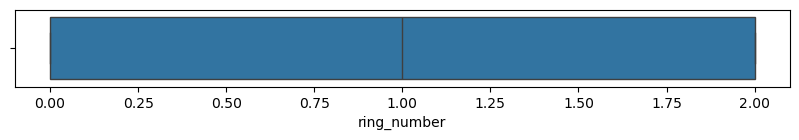

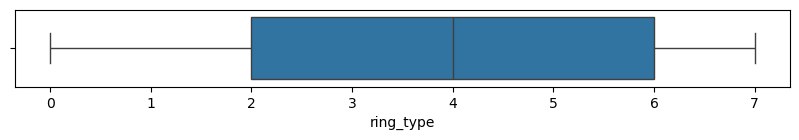

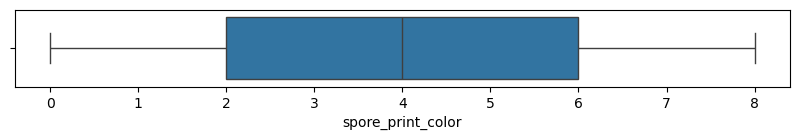

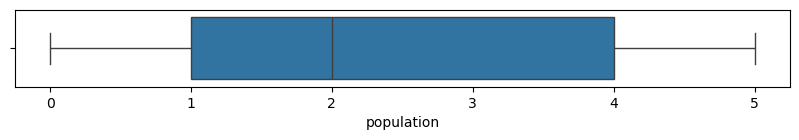

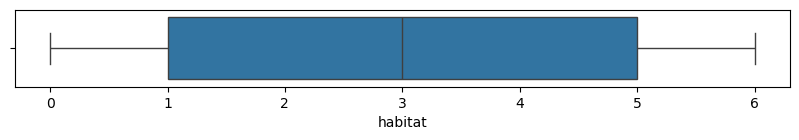

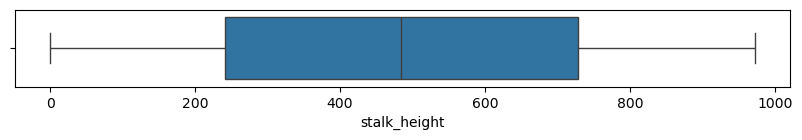

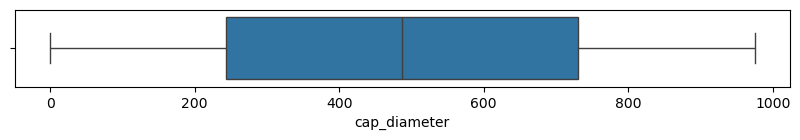

In [18]:

for v in variables:
    plt.figure(figsize=(10,1))    
    sb.boxplot(df[v], orient = 'h' )
    plt.show()

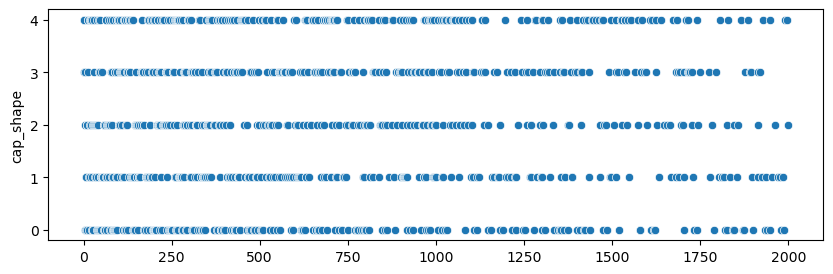

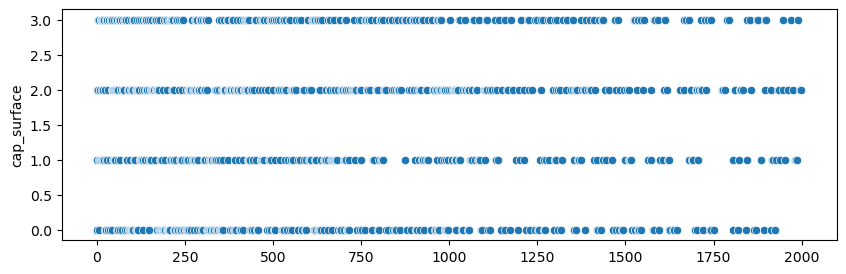

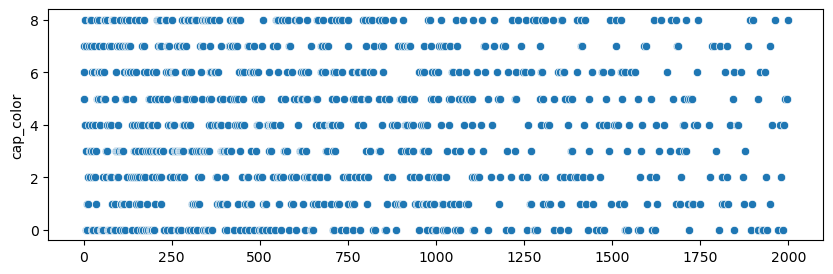

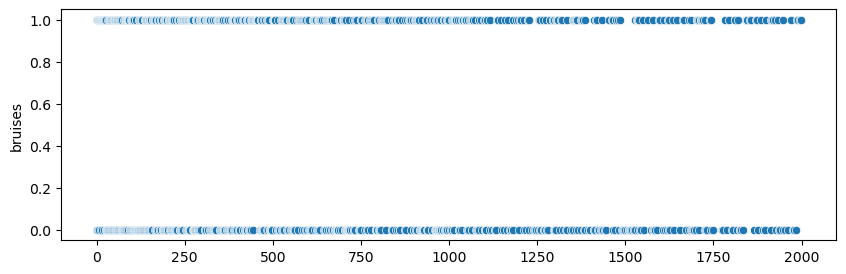

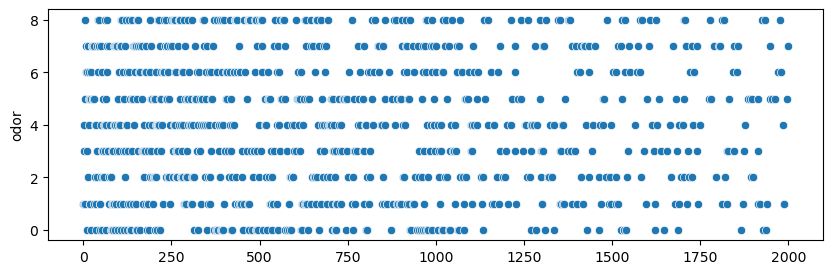

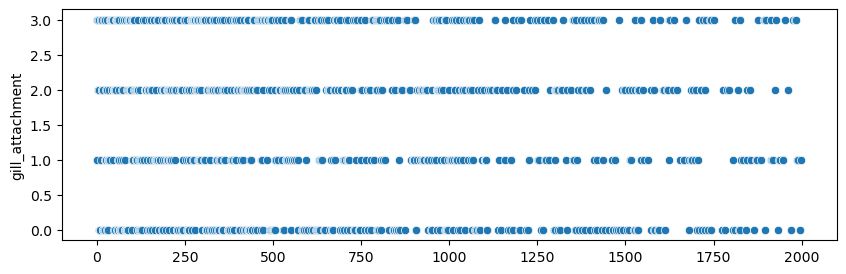

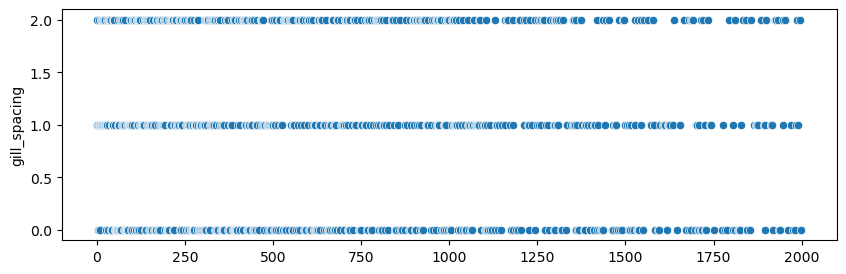

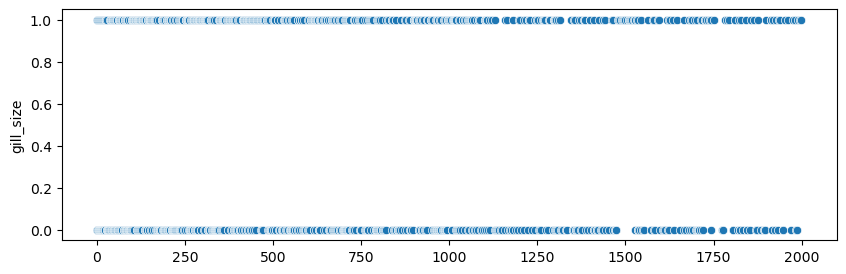

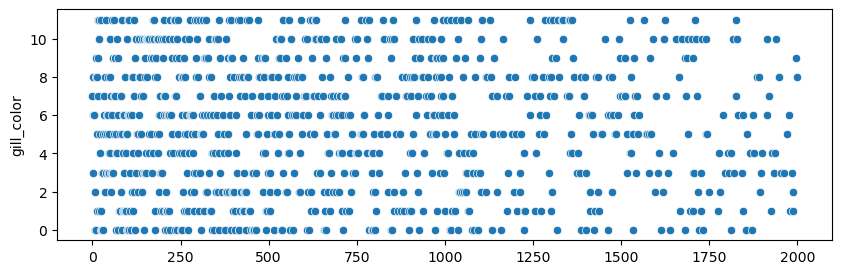

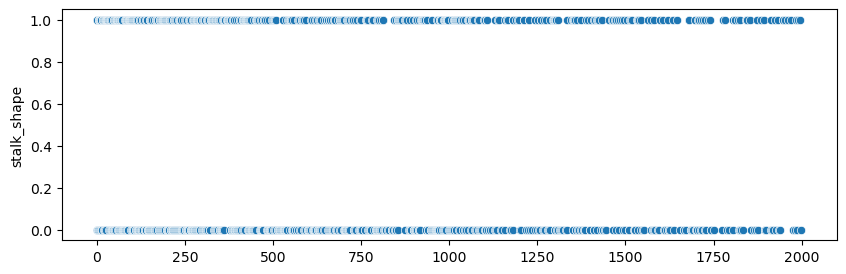

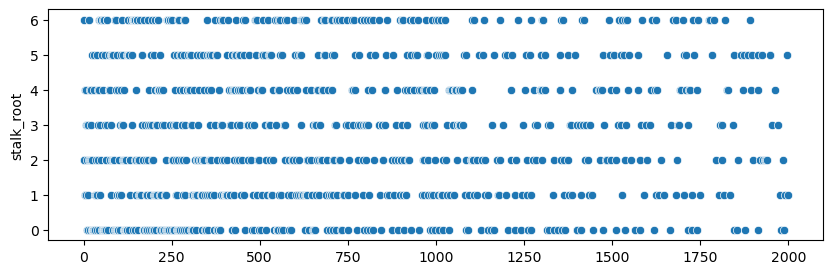

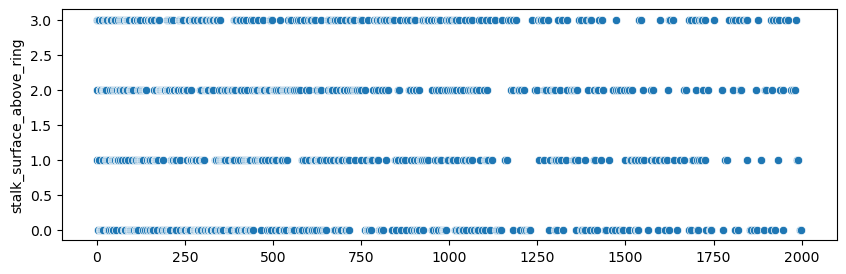

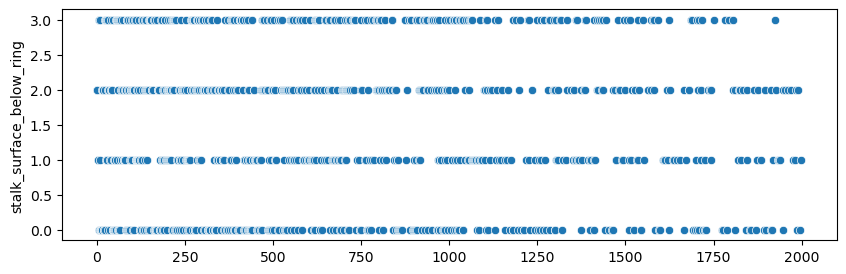

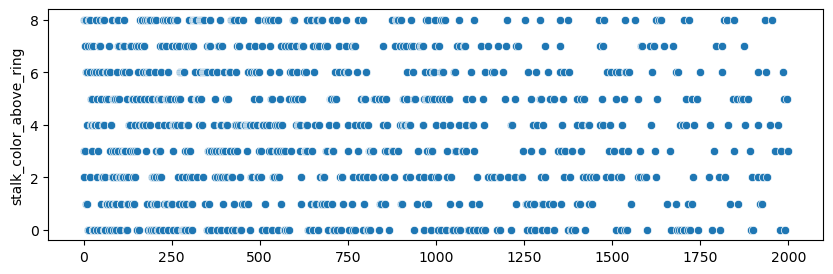

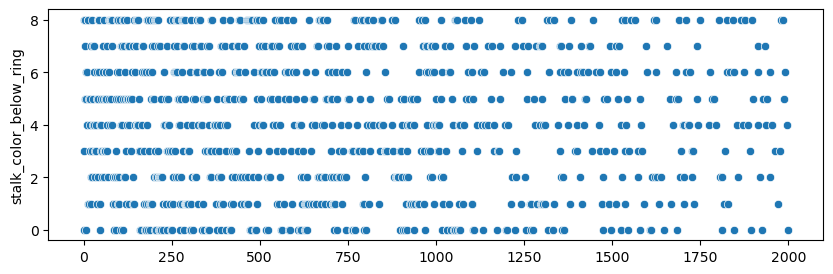

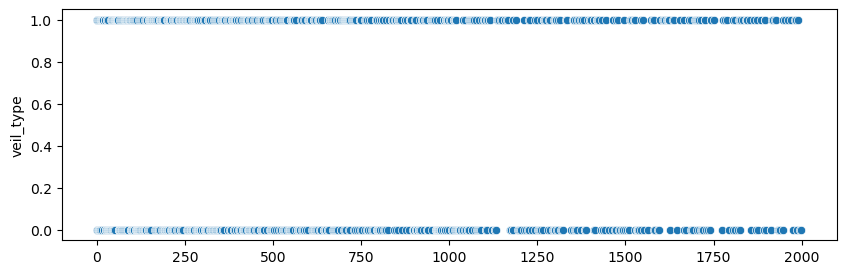

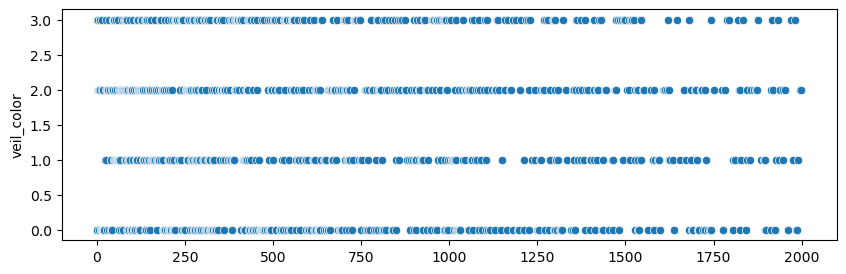

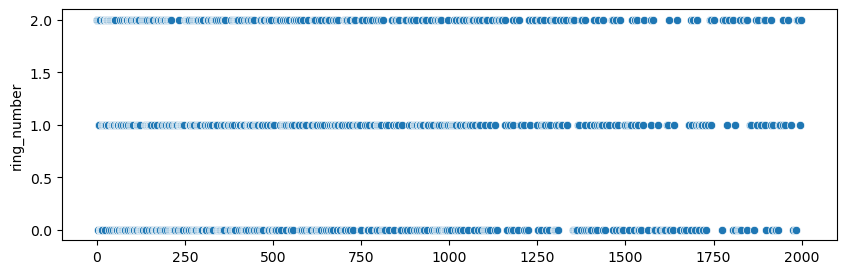

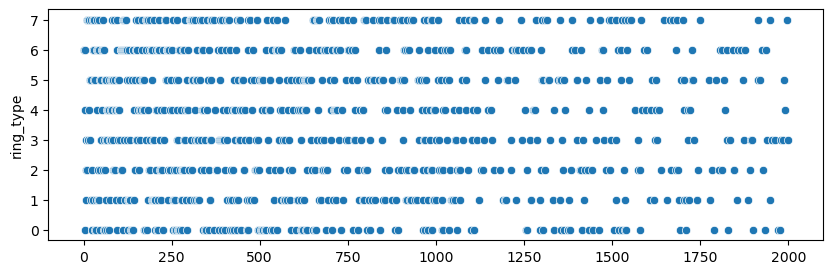

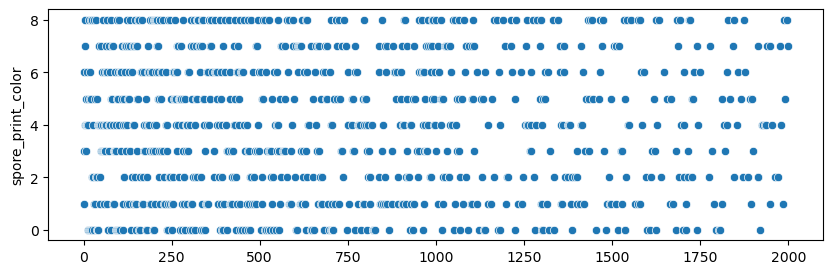

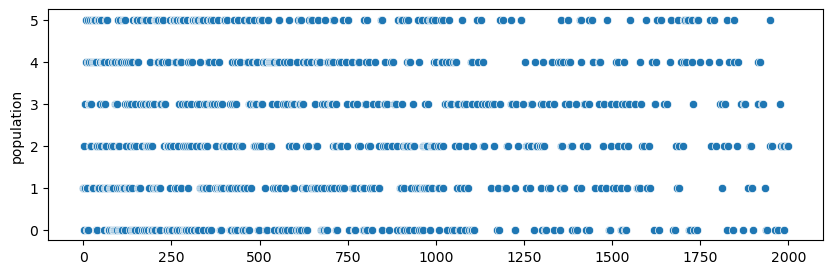

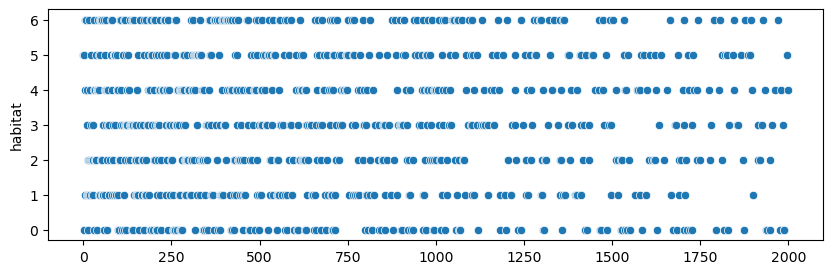

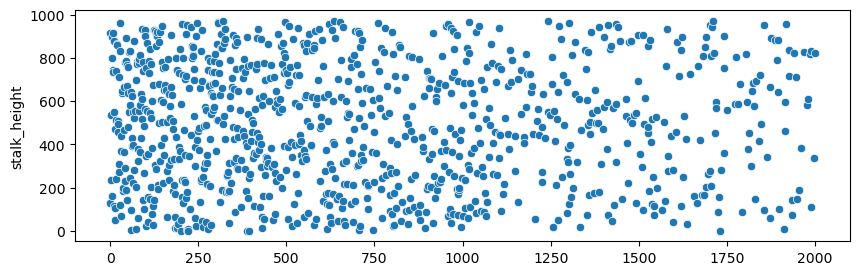

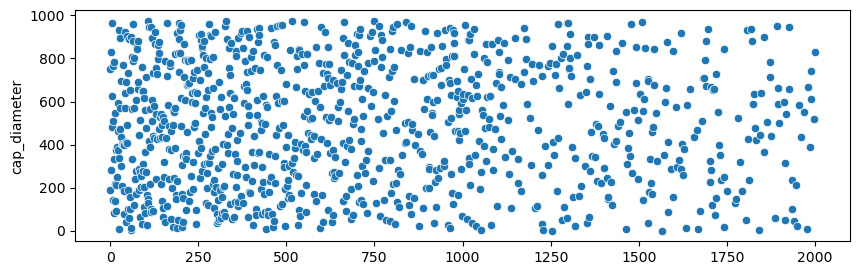

In [19]:

for v in variables:
    plt.figure(figsize=(10,3))    
    sb.scatterplot(df[v])
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
print('Training accuracy:')
print(classification_report(y_train, yhat_train))

Training accuracy:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.62      1.00      0.77       426

    accuracy                           0.62       683
   macro avg       0.31      0.50      0.38       683
weighted avg       0.39      0.62      0.48       683



In [25]:
print('Test accuracy:')
print(classification_report(y_test, yhat_test))

Test accuracy:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.66      1.00      0.79       192

    accuracy                           0.66       293
   macro avg       0.33      0.50      0.40       293
weighted avg       0.43      0.66      0.52       293



In [26]:
# Step 1: Experiment with different SVM hyperparameters
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.620 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.620 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.628 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.625 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.625 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.620 total time=   1.1s
[CV 2/5] END ..............C=0.1, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [54]:
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Estimator: SVC(C=100)


In [55]:
# Retrain SVM with best parameters
best_svm_model = grid.best_estimator_
best_svm_model.fit(x_train, y_train)

SVC(C=100)

In [56]:
# Evaluate model performance
best_yhat = best_svm_model.predict(x_test)
best_accuracy = accuracy_score(y_test, best_yhat)
print("Accuracy (Best Parameters):", best_accuracy)
print("Classification Report (Best Parameters):\n", classification_report(y_test, best_yhat))

Accuracy (Best Parameters): 0.6552901023890785
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.66      1.00      0.79       192

    accuracy                           0.66       293
   macro avg       0.33      0.50      0.40       293
weighted avg       0.43      0.66      0.52       293



In [57]:
# Step 1: Compare SVM performance with different kernels
svm_kernels = ['linear', 'poly', 'rbf']
for kernel in svm_kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    kernel_yhat = svm_model.predict(x_test)
    accuracy_kernel = accuracy_score(y_test, kernel_yhat)
    print("Kernel:", kernel)
    print("Accuracy:", accuracy_kernel)
    print("Classification Report:\n", classification_report(y_test, kernel_yhat))
    

Kernel: linear
Accuracy: 0.6552901023890785
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.66      1.00      0.79       192

    accuracy                           0.66       293
   macro avg       0.33      0.50      0.40       293
weighted avg       0.43      0.66      0.52       293

Kernel: poly
Accuracy: 0.6552901023890785
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.66      1.00      0.79       192

    accuracy                           0.66       293
   macro avg       0.33      0.50      0.40       293
weighted avg       0.43      0.66      0.52       293

Kernel: rbf
Accuracy: 0.6552901023890785
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.66      1.00     